# Setup

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# Disable Error Message from Fastai Bug
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

# Notebook Config

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

## Variables

In [0]:
bs = 16
size = (480,640)

In [0]:
#path = "../../dataset/classifier-data/"
#save_path = "saved-models/"

In [0]:
path = "/gdrive/My Drive/Research/dataset/classifier-data/"
save_path = "/gdrive/My Drive/Research/models/slide_classifier/saved-models/"

## Custom Functions

In [0]:
import shutil, os
def learn_save_copy(learn, name, input_path, export):
    if export:
        learn.export()
        path = input_path + "export.pkl"
    else:
        path = learn.save(name, return_path=True)
    print("Copying from: " + str(path) + "\nCopying to: " + save_path)
    shutil.copy(path, save_path)
    os.remove(path)

# Data Ingestion

In [0]:
np.random.seed(42)

In [0]:
#tfms = get_transforms(do_flip=False)

In [10]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(size=size)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['audience',
  'audience_presenter',
  'audience_presenter_slide',
  'demo',
  'presenter',
  'presenter_slide',
  'presenter_whiteboard',
  'slide',
  'whiteboard'],
 9,
 754,
 188)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

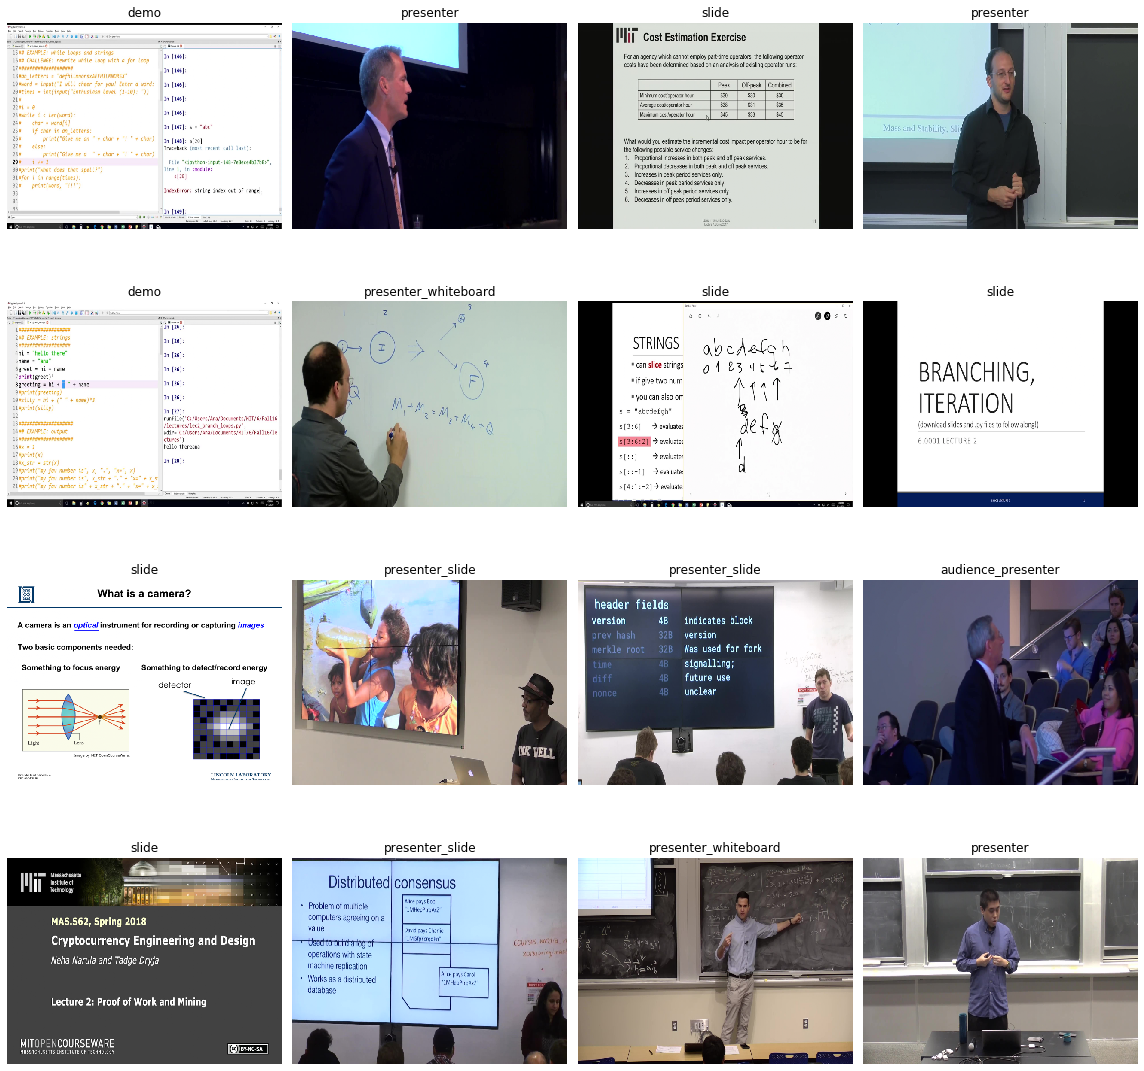

In [12]:
data.show_batch(6)

# Training

## Head (End of NN Training)

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 143MB/s]


In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [15]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2693: UserWarning

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


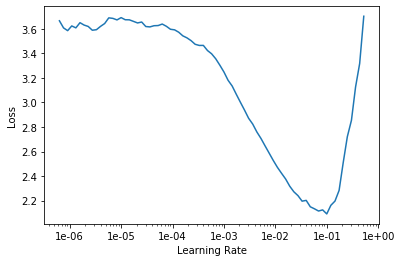

In [16]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(4, 4e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.466825,0.459051,0.138298,02:45
1,0.752134,0.470965,0.106383,01:54
2,0.443960,0.325195,0.058511,01:53
3,0.250857,0.299252,0.063830,01:53


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

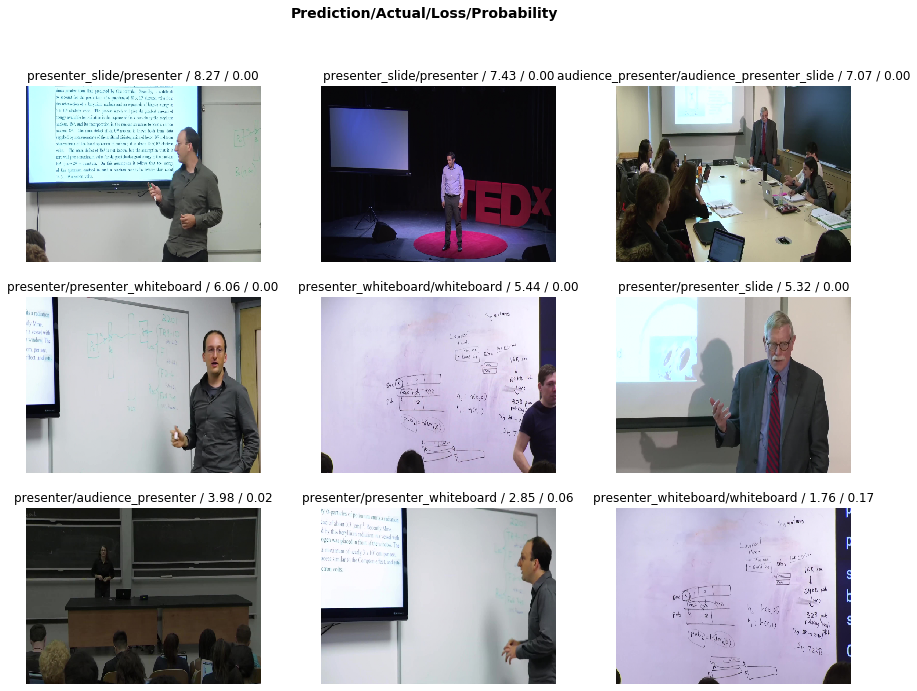

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

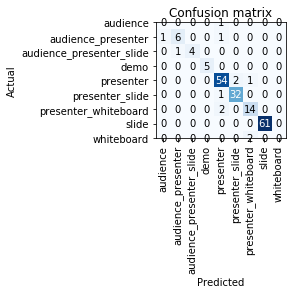

In [21]:
interp.plot_confusion_matrix()

In [22]:
interp.most_confused() #min_val=2

[('presenter', 'presenter_slide', 2),
 ('presenter_whiteboard', 'presenter', 2),
 ('whiteboard', 'presenter_whiteboard', 2),
 ('audience', 'presenter', 1),
 ('audience_presenter', 'audience', 1),
 ('audience_presenter', 'presenter', 1),
 ('audience_presenter_slide', 'audience_presenter', 1),
 ('presenter', 'presenter_whiteboard', 1),
 ('presenter_slide', 'presenter', 1)]

In [0]:
learn.save("frozen-backup")

## Unfreeze

In [0]:
learn.unfreeze()

In [34]:
learn.lr_find() # stop_div=False - https://forums.fast.ai/t/blank-lr-plot-returned/37631/10

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


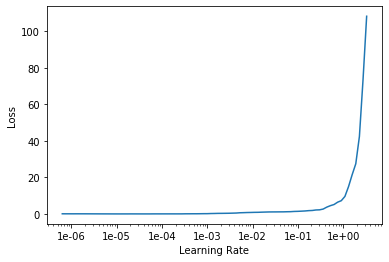

In [35]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, slice(1e-6,1e-4))

## Save

In [36]:
learn_save_copy(learn, "22-vid", path, False)

Copying from: /gdrive/My Drive/Research/dataset/classifier-data/models/22-vid.pth
Copying to: /gdrive/My Drive/Research/models/slide_classifier/saved-models/


In [37]:
learn_save_copy(learn, "22-vid", path, True)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CrossEntropyLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/li

Copying from: /gdrive/My Drive/Research/dataset/classifier-data/export.pkl
Copying to: /gdrive/My Drive/Research/models/slide_classifier/saved-models/
